# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

# Read CSV file

In [4]:
df = pd.read_csv('winequality-red.csv')

In [5]:
#print the first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#describe the entire dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#show information about the values and type of elements in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#shows the sum of null values in each column in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Histogram

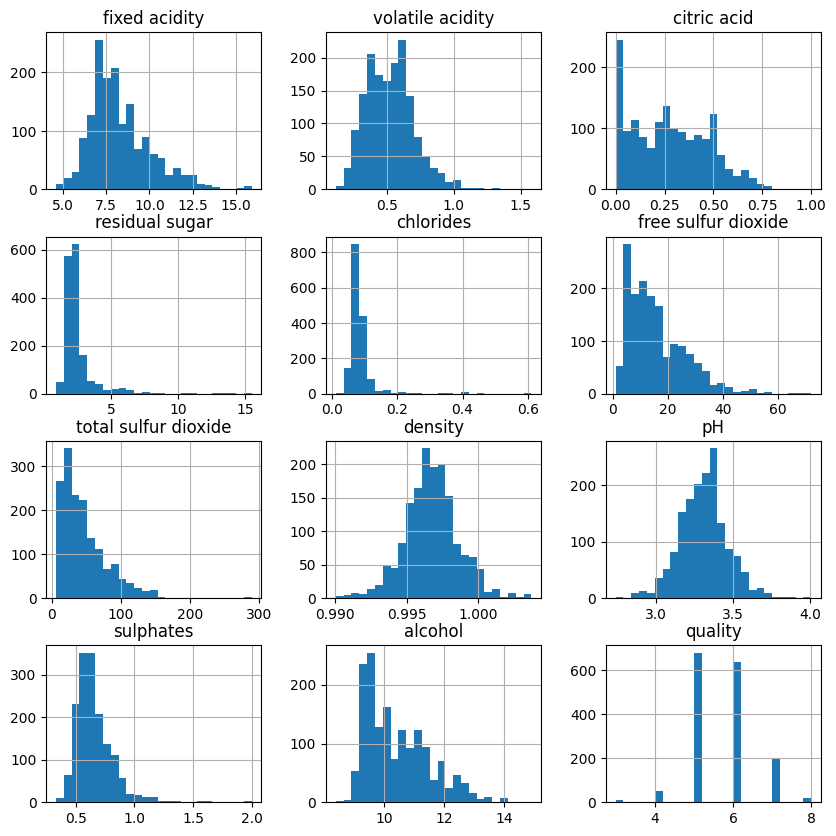

In [9]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

# Bar Graph

Text(0, 0.5, 'alcohol')

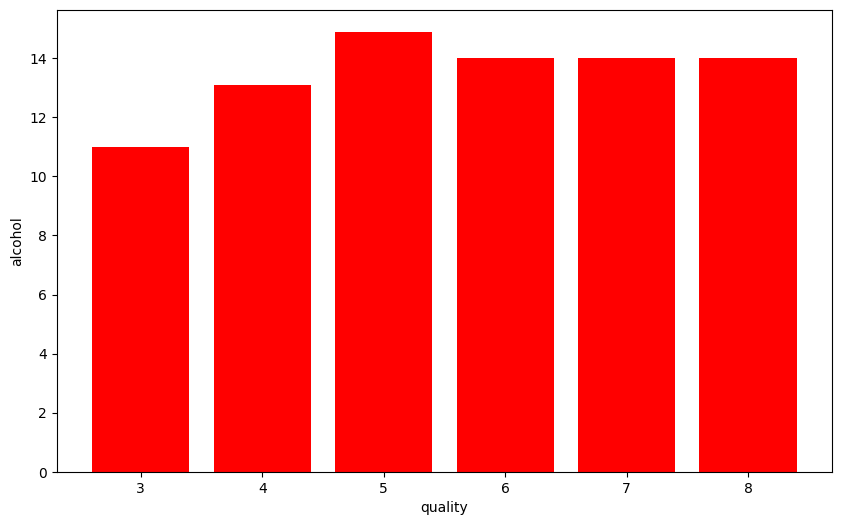

In [10]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

# Correlation Matrix

<Axes: >

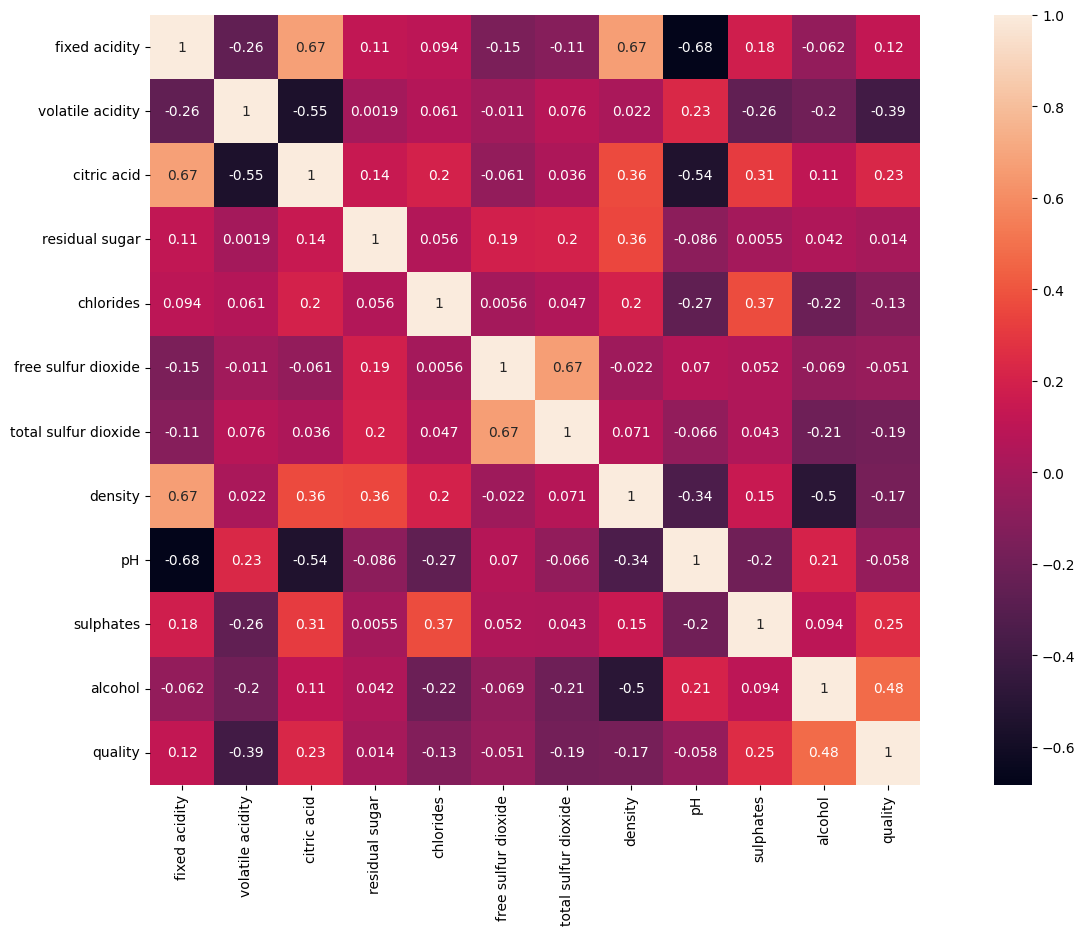

In [11]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='white')
sb.heatmap(df.corr(),cbar=True,square=True,annot=True)

In [12]:
#shows features which are highly correlated
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.6:
            name = df.corr().columns[a]
            print(name)

citric acid
total sulfur dioxide
density
pH


# Preprocessing Dataset

In [13]:
# shows rows which have duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [14]:
#show the sum of duplicated rows
df.duplicated().sum()

240

In [15]:
#dropping duplicated rows
df=df.drop_duplicates()

# Separate features (X) and target variable (y)

In [16]:
X = df.drop(['quality','citric acid','total sulfur dioxide','density','pH'],axis=1)
y = df['quality'] # Target variable

#or you can use this

#X = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

# Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)

In [36]:
# Split the remaining observations into validation
X_val, X_val_test, y_val, y_val_test = train_test_split(X_test, y_test, test_size=0.2,random_state=1)

In [37]:
#Print the numerosities of the three samples
print(X_train.shape[0], X_val.shape[0], X_test.shape[0])

1087 217 272


# Standard Scalling

In [18]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Linear Regression Model

In [19]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)*100

41.1980853935597

# Plotting Linear Regression Model

Text(0.5, 1.0, 'Actual vs Predicted')

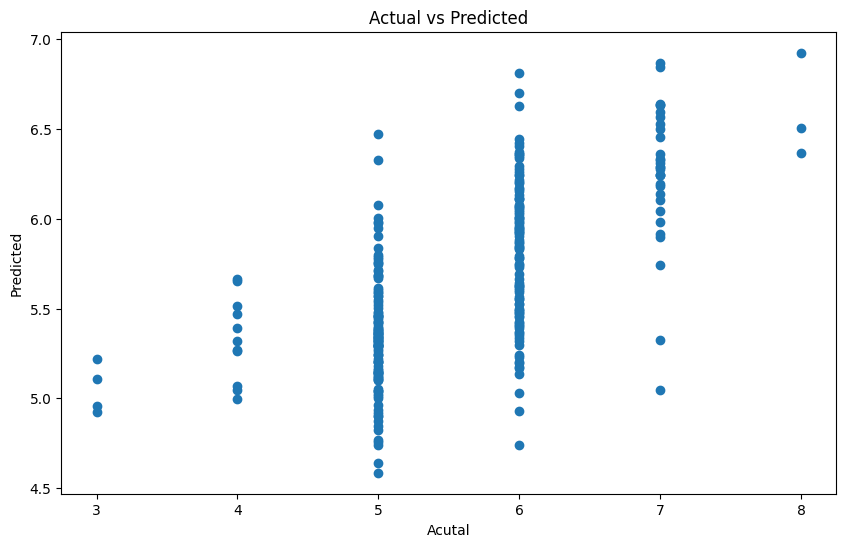

In [20]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.scatter(y_test,y_pred)
# label x-axis
plt.xlabel('Acutal')
#label y-axis
plt.ylabel('Predicted')
#title
plt.title('Actual vs Predicted')

# mean_squared_error

In [21]:
RMSE = mean_squared_error(y_test, y_pred,squared=False)
print(RMSE)

0.6453888814770489


# Loss Curve

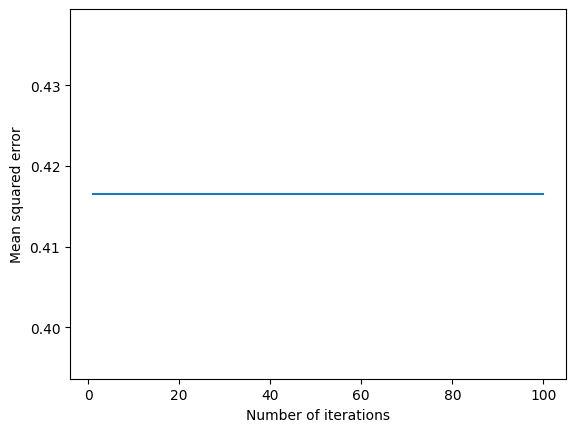

In [23]:
mse_values = []
n_iterations = 100
# Train the model and store MSE on the test set at each iteration
for i in range(n_iterations):  # Adjust the number of iterations as needed
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # You can also print or plot other metrics like R-squared (model.score()) if needed
    # print(f'Iteration {i}, R-squared: {model.score(X_test, y_test)}')

# Plot the loss curve
plt.plot(range(1, n_iterations+1), mse_values)
plt.xlabel('Number of iterations')
plt.ylabel('Mean squared error')
plt.show()

# Cross-validation and model performance

In [ ]:
kf = KFold(n_splits=11, shuffle=True, random_state=42)
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.30630762 0.43212558 0.39799485 0.32084755 0.32769456 0.34149245
 0.31143667 0.32084826 0.33432761 0.31307064 0.25221906]
0.3325786234058058 0.04527274691012039
[0.2657412 0.4235929]


# **Get best num of neighbors**

In [39]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 40)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

In [40]:
best_neighbor, max_test_accuracy = max(test_accuracies.items(), key=lambda x: x[1])

print("Best number of neighbors:", best_neighbor)
#print("Maximum test accuracy:", max_test_accuracy)

Best number of neighbors: 16


# KNN Model

In [25]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)
knn.score(X_test,y_test)*100

63.23529411764706

# Confusion Matrix

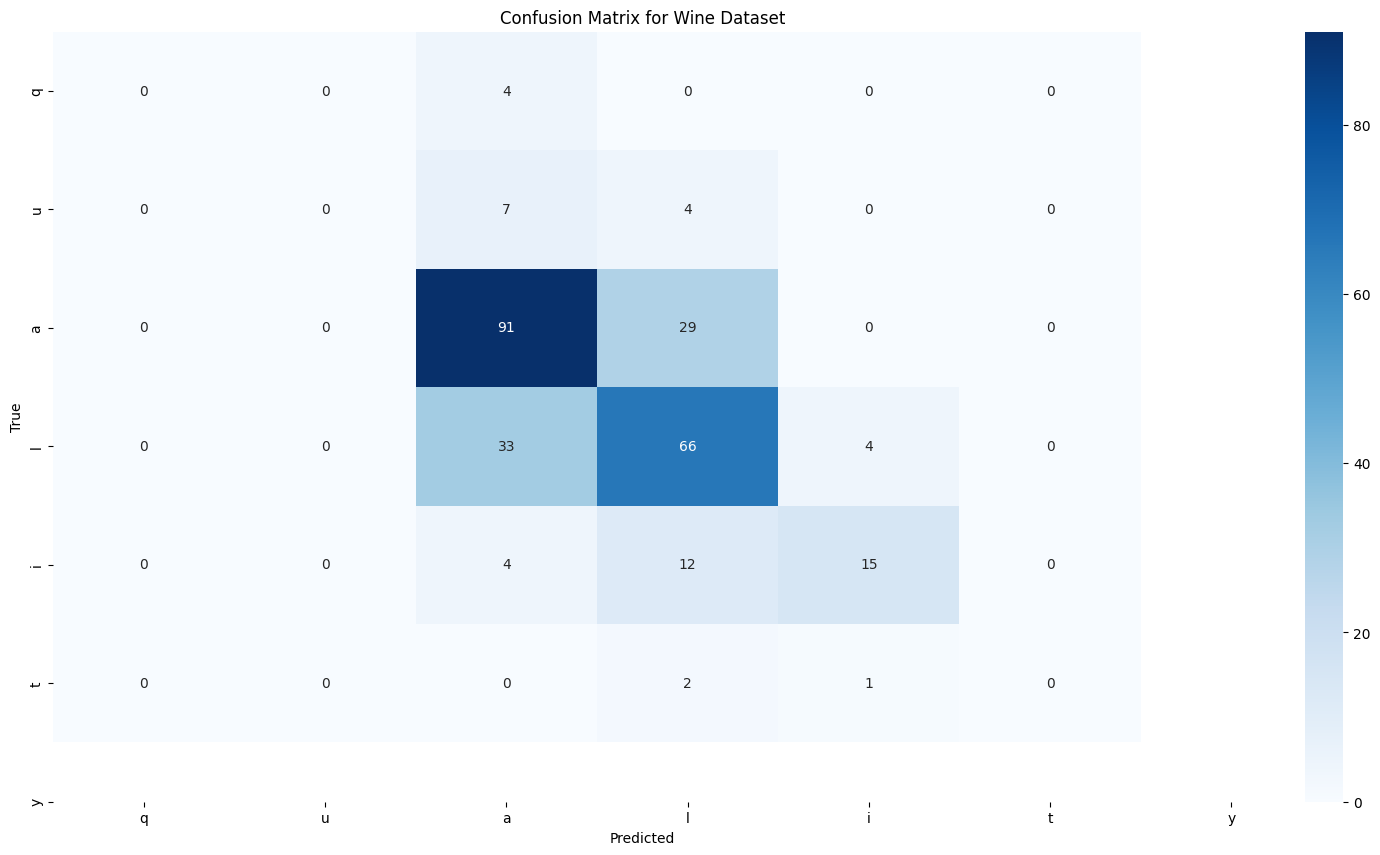

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred1)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(19, 10))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels='quality', yticklabels='quality')
plt.title('Confusion Matrix for Wine Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

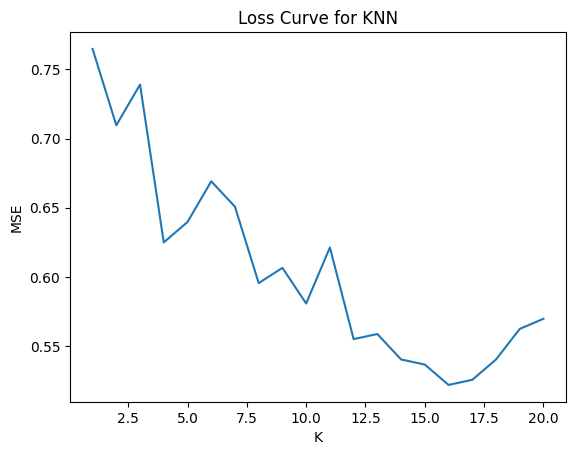

In [29]:
mse_values = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(np.mean((y_test - y_pred) ** 2))

# Plot the loss curve
plt.plot(range(1, 21), mse_values)
plt.title('Loss Curve for KNN')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

# Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)
rfc.score(X_test,y_test)*100

63.23529411764706

# Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred= dtc.predict(X_test)
dtc.score(X_test,y_test)*100

51.83823529411765